# Dot products, angles, and orthogonality

In this section, we review some of the basics of geometry in $\mathbb{R}^n$.

## Dot products and angles

### Review of dot products in $\mathbb{R}^n$

One of the most important quantities we compute in linear algebra are _inner products_, also called the _dot product_.
For two vectors $\boldsymbol{x},\boldsymbol{y} \in \mathbb{R}^n$, the inner product is the number


$$
\boldsymbol{x}^\top \boldsymbol{y} = \sum_{i=1}^n x_iy_i .
$$


Importantly, an inner product can be thought of as a linear function from $\mathbb{R}^n$ to $\mathbb{R}$: if we fix $\boldsymbol{y}\in \mathbb{R}^n$, then the function $T_\boldsymbol{y}(\boldsymbol{x}) = \boldsymbol{x}^\top \boldsymbol{y}$ is clearly linear, since for any $\boldsymbol{x},\boldsymbol{x}' \in \mathbb{R}^n$ and $\alpha \in \mathbb{R}$, we have


$$
\begin{align*}
T_\boldsymbol{y}(\boldsymbol{x} + \alpha \boldsymbol{x}') &= (\boldsymbol{x}+\alpha \boldsymbol{x}')^\top \boldsymbol{y} = \sum_{i=1}^n (x_i + \alpha x'_i)y_i = \sum_{i=1}^n x_iy_i + \alpha\sum_{i=1}^nx'_iy_i \\&= \boldsymbol{x}^\top \boldsymbol{y} + \alpha (\boldsymbol{x}')^\top \boldsymbol{y} = T_\boldsymbol{y}(\boldsymbol{x}) + \alpha T_\boldsymbol{y}(\boldsymbol{x}') .
\end{align*}
$$


Dot products are also the basis of matrix multiplication: if $\boldsymbol{A} \in \mathbb{R}^{n\times m}$ and $\boldsymbol{B}\in \mathbb{R}^{m\times p}$ are matrices, and $\boldsymbol{a}_{1:},\dots, \boldsymbol{a}_{n:}$ are the rows of $A$ and $\boldsymbol{b}_{:1},\dots, \boldsymbol{b}_{:p}$ are the columns of $\boldsymbol{B}$, then the $(i,j)^{th}$ element of $\boldsymbol{AB}$ is just $\boldsymbol{a}_{i:}^\top \boldsymbol{b}_{:j}$.

In this chapter, however, we will be interested in a more geometric interpretation of dot products, namely that they are used to compute the angle between two vectors.

### Computing angles between vectors with dot products

One of the most important facts about dot products is that they give us a way to compute the _angle_ $\theta$ between any two vectors $\boldsymbol{x},\boldsymbol{y}\in \mathbb{R}^n$.
This is due to the following important identity:


$$
\boldsymbol{x}^\top \boldsymbol{y} = \|\boldsymbol{x}\|_2\|\boldsymbol{y}\|_2\cos(\theta)
$$


Therefore we have that the angle $\theta$ can be found with


$$
\theta = \arccos \left(\frac{\boldsymbol{x}^\top \boldsymbol{y}}{\|\boldsymbol{x}\|_2 \|\boldsymbol{y}\|_2}\right)
$$


Let's see a few examples in Python.
First, let's write a useful function which finds the angle between any two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$.

In [1]:
import numpy as np

def angle_between_vectors(x,y):
    xty = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    theta = np.arccos(xty/(norm_x*norm_y))
    return theta

In this function we first compute the dot product $\boldsymbol{x}^\top \boldsymbol{y}$, then the norms of $\boldsymbol{x}$ and $\boldsymbol{y}$.
Finally, we use `np.arccos` to take the arccosine of $\boldsymbol{x}^\top \boldsymbol{y}$ divided by $\|\boldsymbol{x}\|_2\|\boldsymbol{y}\|_2$ to find the angle.

Let's look at a simple example to make sure this works.
For example, consider $\boldsymbol{y} = (1,1)$ and $\boldsymbol{x}= (1,0)$.
The vector $ \boldsymbol{y}$ is on the $45^\circ$ line, and $\boldsymbol{x}$ is on the $x$-axis, and so the angle between them should be $45^\circ$, or $\pi/4$.
Let's first define and plot these vectors.

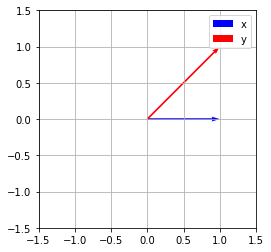

In [2]:
import matplotlib.pyplot as plt

x = np.array([1,0])
y = np.array([1,1])

origin = np.zeros(2)
plt.quiver(*origin, *x, label='x', scale=1, units='xy', color='blue')
plt.quiver(*origin, *y, label='y', scale=1, units='xy', color='red')
plt.grid()

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

As expected, the two vectors appear to be at a $45^\circ$ angle.
Let's use our function to check that this is correct.

In [3]:
theta = angle_between_vectors(x,y)
print('angle between x and y: ', theta)
print('pi/4: ', np.pi/4)

angle between x and y:  0.7853981633974484
pi/4:  0.7853981633974483


As expected, the answer is $\pi/4$.
Let's see what happens when we rotate the vectors by some angle.
Recall that the matrix which rotates vectors by $\theta$ degrees is given by


$$
\boldsymbol{R}_\theta = \begin{bmatrix}\cos(\theta) & -\sin(\theta)\\ \sin(\theta) & \cos(\theta)\end{bmatrix}
$$


Let's write a quick Python function to create this matrix.

In [4]:
def rotation(theta):
    Rtheta = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    return Rtheta

Now let's try rotating $\boldsymbol{y}$ by $90^\circ$ (or $\pi/2$ radians) and $\boldsymbol{x}$ by $45^\circ$ (or $\pi/4$) radians, and plot the newly rotated vectors.

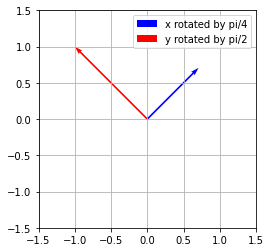

In [5]:
R90 = rotation(np.pi/2)
R45 = rotation(np.pi/4)

y_rotated = np.dot(R90, y)
x_rotated = np.dot(R45, x)

plt.quiver(*origin, *x_rotated, label='x rotated by pi/4', scale=1, units='xy', color='blue')
plt.quiver(*origin, *y_rotated, label='y rotated by pi/2', scale=1, units='xy', color='red')
plt.grid()

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

The vectors appear to now by at a $90^\circ$ angle (which is what we would expect), but we can also verify this using our `angle_between_vectors` function.

In [6]:
print('angle between x (rotated by pi/4) and y (rotated by pi/2): ', angle_between_vectors(x_rotated, y_rotated))

angle between x (rotated by pi/4) and y (rotated by pi/2):  1.5707963267948966


The answer is $\approx 1.5708$, which is just $\pi/2$.

Vectors which are at a $90^\circ$ angle are special -- they are called _orthogonal_ (or _perpendicular_).

### A gotcha

One point which is important to keep in mind when computing angles numerically is that we need to be careful when applying the $\arccos$ function in practice. To meaningfully interpret the angle $\arccos \left(\frac{\boldsymbol{x}^\top \boldsymbol{y}}{\|\boldsymbol{x}\|_2 \|\boldsymbol{y}\|_2}\right)$, we need to have that $-1\leq \frac{\boldsymbol{x}^\top \boldsymbol{y}}{\|\boldsymbol{x}\|_2 \|\boldsymbol{y}\|_2} \leq 1$. This is always true mathematically; however, numerically we could run into situations where $\boldsymbol{x}$ and $\boldsymbol{y}$ are parallel, but when we compute $\frac{\boldsymbol{x}^\top \boldsymbol{y}}{\|\boldsymbol{x}\|_2 \|\boldsymbol{y}\|_2}$ we obtain a number like $1.0000000000000002$. In this case, when we take the arccosine, we won't get a meaningful answer (since it is only defined for values in $[-1,1]$. Let's see a simple example.

In [7]:
np.random.seed(123) #set seed for reproducibility

a = np.random.randn(10)
b = 1.2340124*a

angle_between_vectors(a,b)

<ipython-input-1-4c22cc47b71a>:7: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(xty/(norm_x*norm_y))


nan

 Here our function returns `nan`. We can check that the issue is numerical by computing $\frac{\boldsymbol{x}^\top \boldsymbol{y}}{\|\boldsymbol{x}\|_2 \|\boldsymbol{y}\|_2}$ directly.

In [8]:
np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

1.0000000000000002

Indeed, we get a number which is very slightly larger than $1$. In cases like this, it might be reasonable to try and round the value $\frac{\boldsymbol{x}^\top \boldsymbol{y}}{\|\boldsymbol{x}\|_2 \|\boldsymbol{y}\|_2}$.


## Orthogonal vectors, bases, and matrices

Let's see what it means for two vectors to be orthogonal in terms of their dot product.
If the angle between $\boldsymbol{x}$ and $\boldsymbol{y}$ is $90^\circ$ (or $\pi/2$ radians), then


$$
\begin{align*}
&\arccos \left(\frac{\boldsymbol{x}^\top \boldsymbol{y}}{\|\boldsymbol{x}\|_2 \|\boldsymbol{y}\|_2}\right) = \pi/2 \\\iff &\frac{\boldsymbol{x}^\top \boldsymbol{y}}{\|\boldsymbol{x}\|_2 \|\boldsymbol{y}\|_2} = \cos(\pi/2) = 0\\ \iff & \boldsymbol{x}^\top \boldsymbol{y}= 0
\end{align*}
$$


Therefore, two vectors $\boldsymbol{x}$ and $\boldsymbol{y}$ are _orthogonal_ if and only if their dot product is zero.
Orthogonal vectors play an important role in linear algebra.
In particular, we can define orthogonality between two vectors, between a vector and a subspace, and between two subspaces.

### Orthogonality between two subspaces

The notion of orthogonality is also easily extended to the span of two sets of vectors. For example, consider matrices $\boldsymbol{A} \in \mathbb{R}^{n\times k}$ and $\boldsymbol{B} \in \mathbb{R}^{n\times p}$, and let $\boldsymbol{a}_{:1},\dots,\boldsymbol{a}_{:k} \in \mathbb{R}^n$ and $\boldsymbol{b}_{:1},\dots, \boldsymbol{b}_{:p}\in \mathbb{R}^n$ be their columns. Given these matrices, we can define the following special subspaces of $\mathbb{R}^n$: $V_\boldsymbol{A} = \text{span}(\boldsymbol{a}_{:1},\dots,\boldsymbol{a}_{:k})$ and $V_\boldsymbol{B} = \text{span}(\boldsymbol{b}_{:1},\dots,\boldsymbol{b}_{:p})$. $V_\boldsymbol{A}$ and $V_\boldsymbol{B}$ are called the _column spaces_ of $\boldsymbol{A}$ and $\boldsymbol{B}$, respectively. Then we say that the subspaces $V_\boldsymbol{A}$ and $V_\boldsymbol{B}$ are _orthogonal_ if and only if $\boldsymbol{a}_{:i}^\top \boldsymbol{b}_{:j} = 0$ for all $i=1,\dots,k$ and $j=1,\dots,p$. Since we know that the the $(i,j)^{th}$ element of $\boldsymbol{A}^\top \boldsymbol{B}$ is exactly $\boldsymbol{a}_{:i}^\top \boldsymbol{b}_{:j}$, this is equivalent to saying that $\boldsymbol{A}^\top \boldsymbol{B} = \boldsymbol{0}_{p\times p}$ where $\boldsymbol{0}_{k\times p}$ is the $k\times p$ matrix of all zeros.

As a special case of this, we have that a vector $\boldsymbol{x} = \begin{bmatrix}x_1\\ \vdots \\ x_n\end{bmatrix}$ is orthogonal to the column space of $\boldsymbol{A}$ if $\boldsymbol{Ax}=0$. In this case, we say that $\boldsymbol{x}$ is in the _null space_ of $\boldsymbol{A}$.  We also may use the notation $\text{null}(\boldsymbol{A})$ to denote the set of vectors $\boldsymbol{x}$ such that $\boldsymbol{Ax}= 0$. This set is also a subspace of $\mathbb{R}^n$.

To understand this visually, let's consider the matrix $\boldsymbol{A}$ given below


$$
\boldsymbol{A} = \begin{bmatrix}1 & 0\\ 2& 3\\ 3&2\end{bmatrix}
$$


Let's define the columns as vectors $\boldsymbol{a}_{:1} = \begin{bmatrix}1\\2\\3\end{bmatrix}$ and $\boldsymbol{a}_{:2} = \begin{bmatrix}0\\3\\2\end{bmatrix}$.

In [9]:
a1 = np.array([1,2,3])
a2 = np.array([0,3,2])

The subspace $V_\boldsymbol{A} = \text{span}(\boldsymbol{a}_{:1},\boldsymbol{a}_{:2})$ is a plane in $\mathbb{R}^3$, which we can visualize with the code below.

<ipython-input-10-971b28b9a8ec>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


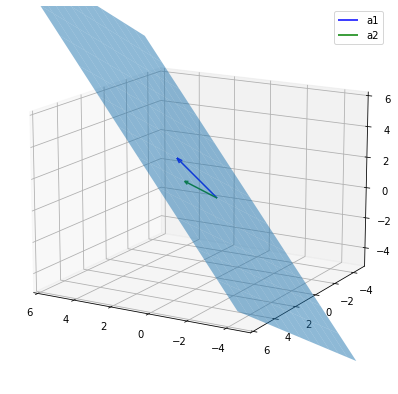

In [10]:
cp = np.cross(a1, a2)
a, b, c = cp

origin = np.zeros(3)

d = np.dot(cp, origin)

fig = plt.figure(figsize=(16,7))
ax = fig.gca(projection='3d')

ax.quiver(*origin,*a1, length=1, arrow_length_ratio=0.1, colors='b', label='a1')
ax.quiver(*origin,*a2, length=1, arrow_length_ratio=0.1, colors='g', label='a2')

ax.legend()
xx, yy = np.meshgrid(np.arange(-5,8), np.arange(-5,8))
q = (d - a * xx - b * yy) / c

ax.plot_surface(xx, yy, q, alpha=0.5)
ax.view_init(15, 120)

plt.grid()
ax.set_xlim(-5,6)
ax.set_ylim(-5,6)
ax.set_zlim(-5,6)

plt.show()

Now let's find a vector that's orthogonal to the _subspace_ $V_\boldsymbol{A}$. Such a vector $\boldsymbol{x} = \begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}$ satisfies


$$
0 = \boldsymbol{a}_{:1}^\top \boldsymbol{x} = x_1 + 2x_2 + 3x_3\;\;\; \text{ and }\;\;\; 0 = \boldsymbol{a}_{:2}^\top x = 3x_2 + 2x_3
$$


With some algebra, it is easy to verify that any vector $\boldsymbol{x}$ of the form $\boldsymbol{x} = \begin{bmatrix}\frac{5}{2}\alpha \\ \alpha \\ -\frac{3}{2}\alpha\end{bmatrix}$ will satisfy these conditions. Let's see an example with $\alpha = -2$.

In [11]:
alpha = -2

x = np.array([5/2*alpha, alpha, -3/2*alpha])

Now let's plot $\boldsymbol{x}$ and see that it is in fact orthogonal to the plane $V_\boldsymbol{A}$.

<ipython-input-12-3ad0f67e00da>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


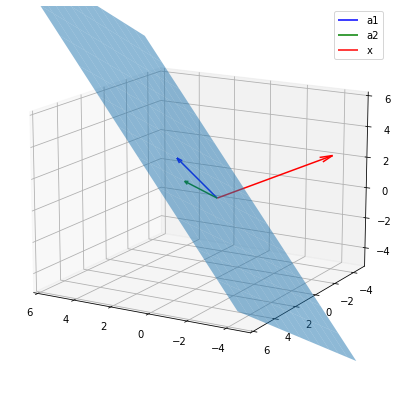

In [12]:
cp = np.cross(a1, a2)
a, b, c = cp

origin = np.zeros(3)

d = np.dot(cp, origin)

fig = plt.figure(figsize=(16,7))
ax = fig.gca(projection='3d')

ax.quiver(*origin,*a1, length=1, arrow_length_ratio=0.1, colors='b', label='a1')
ax.quiver(*origin,*a2, length=1, arrow_length_ratio=0.1, colors='g', label='a2')
ax.quiver(*origin,*x, length=1, arrow_length_ratio=0.1, colors='r', label='x')

ax.legend()
xx, yy = np.meshgrid(np.arange(-5,8), np.arange(-5,8))
q = (d - a * xx - b * yy) / c

ax.plot_surface(xx, yy, q, alpha=0.5)
ax.view_init(15, 120)

plt.grid()
ax.set_xlim(-5,6)
ax.set_ylim(-5,6)
ax.set_zlim(-5,6)

plt.show()

As we can see, not only is the vector $x$ orthogonal to both the vectors $\boldsymbol{a}_{:1}$ and $\boldsymbol{a}_{:2}$, but it is in fact orthogonal to the entire subspace $V_\boldsymbol{A}$.


### Orthogonal and orthonormal sets and bases

Before defining what an orthogonal basis is, we first cover what it means for a set of vectors to be orthogonal.
A set $V = \{\boldsymbol{v}_1,\dots,\boldsymbol{v}_k\}$ of vectors $\boldsymbol{v}_1,\dots,\boldsymbol{v}_k \in \mathbb{R}^n$ is called an _orthogonal set_ if $\boldsymbol{v}_i^\top \boldsymbol{v}_j = 0$ for any $i\neq j$.
Since a basis is just a linearly indepedent set of vectors which spans a vector space, an _orthogonal basis_ is simply a basis which is also orthogonal.

For example, the standard basis in $\mathbb{R}^n$ is orthogonal.
Here the standard basis is the set $E = \{\boldsymbol{e}_1,\dots, \boldsymbol{e}_n\}$ where


$$
\boldsymbol{e}_i = \begin{bmatrix}0\\ \vdots \\1\\ \vdots \\ 0\end{bmatrix}
$$


i.e., it is $1$ in the $i^{th}$ coordinate and $0$ elsewhere.
Then since for $i\neq j$, the vectors $\boldsymbol{e}_i$ and $\boldsymbol{e}_j$ don't have any non-zero entries in common, it is easy to see that $\boldsymbol{e}_i^\top \boldsymbol{e}_j = 0$.
Hence the set $E$ is an orthogonal set, and since we know it is a basis, it is also an orthogonal basis!

It turns out that requiring a set to be orthogonal an linearly independent is superfluous: every orthogonal set is automatically linearly independent (though the converse is not true).
We won't prove this here, but it is a good exercise to try on your own.
Therefore, an orthogonal basis for $\mathbb{R}^n$ is any orthogonal set of vectors which spans $\mathbb{R}^n$.
While the standard basis is an easy example, it is not the only example.
For instance, any rotation of the standard basis is also an orthogonal basis.

For example, let's start with the standard basis in $\mathbb{R}^2$:


$$
\boldsymbol{e}_1 = \begin{bmatrix}1\\ 0\end{bmatrix},\;\;\; \boldsymbol{e}_2 = \begin{bmatrix}0\\ 1\end{bmatrix}
$$


Let's define these in Python.

In [13]:
e1 = np.array([1,0])
e2 = np.array([0,1])

Now, let's try rotating these vectors by $45^\circ$.
To do this, we can use the rotation matrix that we defined in the previous section.

In [14]:
R45 = rotation(np.pi/4)

v1 = np.dot(R45, e1)
v2 = np.dot(R45, e2)

print('v1 = ', v1)
print('v2 = ', v2)

v1 =  [0.70710678 0.70710678]
v2 =  [-0.70710678  0.70710678]


This gives the vectors


$$
\boldsymbol{v}_1 = \begin{bmatrix}1/\sqrt{2}\\ 1/\sqrt{2}\end{bmatrix},\;\;\; \boldsymbol{v}_2 = \begin{bmatrix}-1/\sqrt{2}\\ 1/\sqrt{2}\end{bmatrix}
$$


Let's check that these vectors are still orthogonal, but in two different ways.
First, we can use the `angle_between_vectors` function to check that the angle between $\boldsymbol{v}_1$ and $\boldsymbol{v}_2$ is indeed $90^\circ$.

In [15]:
angle_between_vectors(v1,v2)

1.5707963267948966

As expected, we get $\pi/2$ back.
On the other hand, we can also check that $v_1^\top v_2 = 0$:

In [16]:
np.dot(v1,v2)

0.0

The set $\{\boldsymbol{v}_1,\boldsymbol{v}_2\}$ is not only an orthogonal set, but it is in fact an _orthonormal set_.
This means that the vectors are orthogonal, but are also unit vectors.
Given an orthogonal set, it is easy to construct an othonormal set by simply dividing each vector in the set by its norm.
If $V = \{\boldsymbol{v}_1,\dots, \boldsymbol{v}_k\}$ is an orthonormal set, then we have


$$
\boldsymbol{v}_i^\top \boldsymbol{v}_j = \begin{cases}1 & \text{if } i=j\\ 0 & \text{if } i\neq j\end{cases}
$$


### Orthogonal matrices

Suppose we have an orthonormal set of vectors $V = \{\boldsymbol{v}_1,\dots,\boldsymbol{v}_k\}$, where $\boldsymbol{v}_i \in \mathbb{R}^n$.
We can stack these vectors into a $n\times k$ matrix $\boldsymbol{Q}$, with $\boldsymbol{v}_{i}$ being the $i^{th}$ column of $\boldsymbol{Q}$:


$$
\boldsymbol{Q} = \begin{bmatrix}|&|&&|\\ \boldsymbol{v}_1 & \boldsymbol{v}_2 & \cdots & \boldsymbol{v}_k\\ |&|&&|\end{bmatrix}
$$


Let's see what happens what we compute the matrix $\boldsymbol{Q}^\top \boldsymbol{Q}$.
Since $\boldsymbol{Q}$ is $n\times k$, $\boldsymbol{Q}^\top \boldsymbol{Q}$ is a $k\times k$.
As we mentioned earlier in this section, the $(i,j)^{th}$ entry of $\boldsymbol{Q}^\top \boldsymbol{Q}$ is just $\boldsymbol{v}_i^\top \boldsymbol{v}_j$.
Therefore, we have the following description of the entries of $\boldsymbol{Q}^\top \boldsymbol{Q}$:


$$
[\boldsymbol{Q}^\top \boldsymbol{Q}]_{ij} = \boldsymbol{v}_i^\top \boldsymbol{v}_j = \begin{cases}1 & \text{if } i=j\\ 0 & \text{if } i\neq j\end{cases}
$$


Therefore, the diagonal entries of $\boldsymbol{Q}^\top \boldsymbol{Q}$ are $1$ and the off-diagonal entries are 0.
Said another way, $\boldsymbol{Q}^\top \boldsymbol{Q} = \boldsymbol{I}$ -- i.e., it is the identity matrix on $\mathbb{R}^k$.
Any matrix $\boldsymbol{Q}$ which satisfies $\boldsymbol{Q}^\top \boldsymbol{Q} = \boldsymbol{I}$ is called an _orthogonal matrix_.
Equivalently, an orthogonal matrix is a matrix whose columns form an orthonormal set.

**Remark:** One point that often causes confusion is that an orthogonal matrix $\boldsymbol{Q}$ doesn't just have _orthogonal_ columns, but rather _orthonormal_ columns.
Perhaps it would make more sense to call such a matrix $\boldsymbol{Q}$ an orthonormal matrix, but unfortunately this terminology is now standard, and so it is important to remember this distinction.

Let's see a few examples of orthogonal matrices in Python.
We can start with our set $\{\boldsymbol{v}_1,\boldsymbol{v}_2\}$ that we defined above, from rotating the standard basis by $45^\circ$.

In [17]:
Q = np.stack([v1,v2], axis=1)
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Let's check that $\boldsymbol{Q}^\top \boldsymbol{Q} = I$.

In [18]:
np.dot(Q.T, Q).round(8)

array([[1., 0.],
       [0., 1.]])

Here we round to 8 decimals to avoid issues of numerical precision (though in practice you may want to be careful when doing this).
In fact, since the matrix $\boldsymbol{Q}$ is square in this case, we observe that $\boldsymbol{Q}^{-1} = \boldsymbol{Q}^\top$.
This relationship is true for any square orthogonal matrix.

We can also look at a bigger example.
For now, we won't explain how the below method works; we will cover this in the next section of the workbook.

In [19]:
n = 10
k = 5

A = np.random.randn(n, k)
Q, _ = np.linalg.qr(A)
Q

array([[-0.29879562, -0.08953108,  0.28310143, -0.17812753,  0.1817313 ],
       [-0.1911694 , -0.5275274 ,  0.25809256,  0.26005771,  0.05751883],
       [ 0.32453527, -0.19070235, -0.27823328,  0.23202825,  0.44990415],
       [-0.28069118, -0.29076626, -0.55215378, -0.01522534,  0.13783841],
       [-0.1125048 ,  0.53952547, -0.19709356,  0.12622255, -0.39309112],
       [-0.07642162, -0.02851513,  0.14712695, -0.4140561 , -0.17919942],
       [-0.35446295,  0.2289251 , -0.04288013,  0.71914892,  0.05203953],
       [-0.00520691, -0.49825669, -0.14498771,  0.15888964, -0.73422497],
       [-0.56956093,  0.00740262,  0.35069433,  0.00974239,  0.07492084],
       [ 0.47063404, -0.01282762,  0.51440781,  0.34158609, -0.09061755]])

Let's check that the $10\times 5$ matrix $\boldsymbol{Q}$ is in fact orthogonal, by checking that $\boldsymbol{Q}^\top \boldsymbol{Q} = \boldsymbol{I}$.

In [20]:
np.dot(Q.T, Q).round(8)

array([[ 1., -0., -0.,  0., -0.],
       [-0.,  1.,  0.,  0.,  0.],
       [-0.,  0.,  1., -0., -0.],
       [ 0.,  0., -0.,  1., -0.],
       [-0.,  0., -0., -0.,  1.]])

Indeed it is.

In the above code, we used something called a QR decomposition to generate the othogonal matrix $\boldsymbol{Q}$.
This is a generic method which we can use to find an orthogonal set from any given set of vectors in $\mathbb{R}^n$.
This is one of the most important decompositions in linear algebra, and we will discuss it in much more detail in the next sections of the workbook.